## Task 1: Users to Movies


The following example is from from http://web.stanford.edu/class/cs246/slides/06-dim_red.pdf

Consider the following data matrix, $X$, 

<img src="img.png" height="300" width="300" align='center'>

- Here, each row corresponds to the ratings submitted by a single user on a scale of $1$ to $5$ for each of the movies. If a user hasn't submitted a movie rating, then rating is then marked by a zero. 
- By a visual inspection, we see that the movies are either **sci-fi** or **romance**
- The individual movies that we start with can be considered 5 different dimensions, whereas when we group them into two genres (sci-fi or romance), these may be seen as a compressed representation of our data.
- So the natural question is, can we it possible to gain compressed representation of our data matrix to highlight this distinction in our data?


In [1]:
# Import necessary libs:

# 1. import plt from matplotlib
# 2. import Axes3D from mpl_toolkits.mplot3d
# 3. import proj3d from mpl_toolkits.mplot3d
# 4. import FancyArrowPatch from matplotlib.patches
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [2]:
# Create the dataset using the np.array() with the data provided above
X = np.array([[1, 1, 1, 0, 0],
              [3, 3, 3, 0, 0],
              [4, 4, 4, 0, 0],
              [5, 5, 5, 0, 0],
              [0, 2, 0, 4, 4],
              [0, 0, 0, 5, 5],
              [0, 1, 0, 2, 2]])
# Store the number of users for further usages.
NumberOfUsers = np.size(X,0)

# Store the number of movies for further usages.
NumberOfMovies = np.size(X,1)


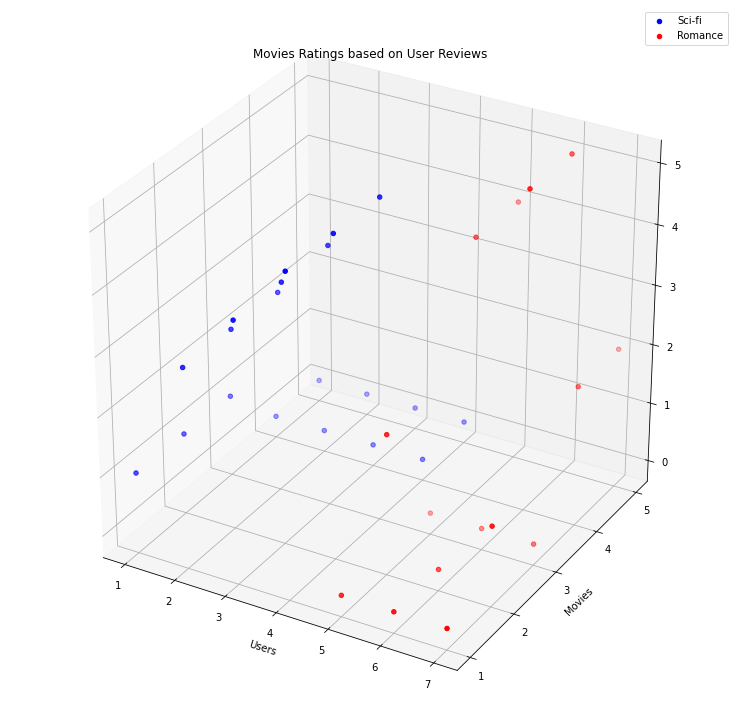

In [3]:
# Plot the data set:

# 1. Create three arrays: users, movie, and reviews. to represent the data matrix
#     that is users[0], movie[0] and reviews[0] represent the review of the first user on the first movie.
# tips: use np.array() and flatten() function.
users =np.array([[j]*NumberOfMovies for j in range(1, NumberOfUsers+1)]).flatten()
movies = np.array([[j] for j in range(1, NumberOfMovies+1)]*NumberOfUsers).flatten()
reviews = X.flatten()
# 2. Set the figure size to (13,13) by using the function plt.figure().
fig = plt.figure(figsize=(13,13))

# 3. Add the subplot that point the 1*1 grid by using the function add_subplot() on the figure object.
#     set the first positional arguments to 111 and projection to 3d.
ax = fig.add_subplot(111, projection='3d')


# 4. Set the font size of the legend to be 10 by using plt.rcParams with 'legend.fontsize' as the key.
plt.rcParams['legend.fontsize'] = 10

# 5. Plot the dataset using plot() for the Sci-fi movie and set x to be the user list, y to be the movie list and z to be the reviews
#     moreover, set resonalbe color and label legend.
ax.scatter(users[:20],movies[:20],reviews[:20],label="Sci-fi",color="b")


# 6. Plot the dataset using plot() for the Romance follow the pervious instruction.
ax.scatter(users[20:],movies[20:],reviews[20:],label="Romance",color="r")


# 7. Set the legend to a proper position using ax.legend(loc=?)
ax.legend(loc=0)


# 8. Set label for the x and y axis with proper front size using plt.xlabel(...)
plt.xlabel('Users')
plt.ylabel('Movies')

# 9. Set the title of this fig using plt.title()
plt.title("Movies Ratings based on User Reviews")


# 10. Set the ticks for x axis and y aixs by using plt.xticks()/yticks()
plt.xticks([0,1,2,3,4,5,6,7])
plt.yticks([1,2,3,4,5])

# 11. plot and present the fig using plt.show()
plt.show()



In [4]:
# Data Preprocessing:

# 1. Calculate the mean of the data set
datasetmean= X.mean(axis=0)
# 2. Subtract the mean from the data set
# 3. Store the new centered data set
New_centered = X - datasetmean
print(New_centered)


[[-0.85714286 -1.28571429 -0.85714286 -1.57142857 -1.57142857]
 [ 1.14285714  0.71428571  1.14285714 -1.57142857 -1.57142857]
 [ 2.14285714  1.71428571  2.14285714 -1.57142857 -1.57142857]
 [ 3.14285714  2.71428571  3.14285714 -1.57142857 -1.57142857]
 [-1.85714286 -0.28571429 -1.85714286  2.42857143  2.42857143]
 [-1.85714286 -2.28571429 -1.85714286  3.42857143  3.42857143]
 [-1.85714286 -1.28571429 -1.85714286  0.42857143  0.42857143]]


## Solution1: Implementing PCA using Singular Value Decomposition (SVD)

We start with the simplest and most straightforward strategy first - **Singular Value Decomposition**. <br>

From our Matrix theory, we know that ever matrix out there can we decomposed into a multiplication of 3 matrices (image is from Tim Roughgarden):

$$ X = U S  V^T$$

In class we proved that we can use the SVD to factorize $X^TX=(USV^T)^T(USV^T)=VS^2V^T$.

The principal components of the matrix $A=X^TX$, lie in the rows of matrix $V^T$. Therefore, by selecting the first $k$ columns of $V$, we end up selecting $v_1, v_2, ..., v_k$ vectors.


In [5]:
# Calculate the U, S, V^T:
# 1. Use the singular value decomposition from numpy.
# 2. np.linalg.svd()
# 3. Store the u,s,v^T values
u,s,v_T = np.linalg.svd(New_centered)
# print(u,s,v_T)

In [6]:
print("U.shape, S.shape, V.T.shape ->", u.shape, s.shape, v_T.shape, end="\n\n")

print("U =",np.around(u, decimals=3), sep="\n", end="\n\n")

print("S =",np.around(s, decimals=3), sep="\n", end="\n\n")

print("V.T =",np.around(v_T, decimals=3), sep="\n", end="\n\n")

U.shape, S.shape, V.T.shape -> (7, 7) (5,) (5, 5)

U =
[[ 0.014 -0.691  0.158  0.343 -0.51   0.059 -0.341]
 [ 0.265 -0.142  0.077 -0.059 -0.184 -0.839  0.403]
 [ 0.39   0.133  0.036 -0.596 -0.595  0.329  0.11 ]
 [ 0.516  0.408 -0.004  0.702 -0.158  0.155  0.16 ]
 [-0.388  0.286 -0.686  0.091 -0.47  -0.211 -0.154]
 [-0.546  0.347  0.662  0.099 -0.325 -0.028  0.162]
 [-0.25  -0.34  -0.244  0.115 -0.036  0.339  0.796]]

S =
[10.492  4.09   1.324  0.     0.   ]

V.T =
[[ 0.471  0.374  0.471 -0.456 -0.456]
 [ 0.356  0.412  0.356  0.537  0.537]
 [ 0.389 -0.831  0.389  0.061  0.061]
 [-0.038  0.     0.038 -0.706  0.706]
 [ 0.706 -0.    -0.706 -0.038  0.038]]



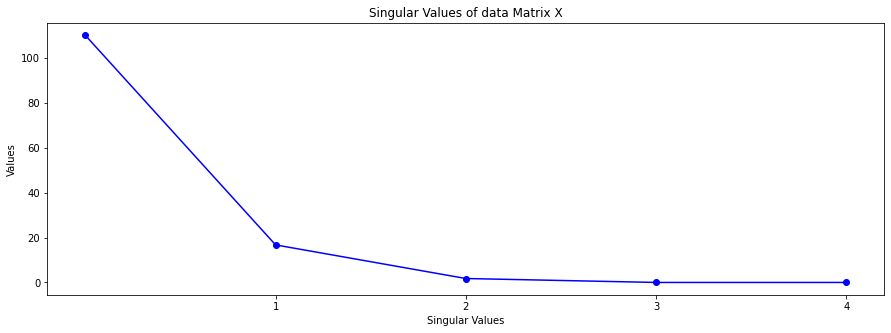

In [7]:
# plot the singlar values for the  D  matrix.
# 1. Calculate the D matrix using s: D is s*s
D = s*s
# 2. Set the fig size to (15,5)
fig = plt.figure(figsize=(15,5))
# 3. Add the line chart using plt.plot( ?? ,'bo-')
plt.plot(D,'bo-')
# 3. Add proper tital, ticks, axis labels
plt.title('Singular Values of data Matrix X')
plt.xlabel('Singular Values')
plt.ylabel('Values')
plt.xticks(ticks=[1,2,3,4])
plt.show()

In [8]:
# Obtaining our compressed data representation:
# 1. Determine at least k singular values are needed to represent the data set from the fig above
k = 2
# 2. Obtain the first k of v^T and store it
k_v_T = v_T[:k].T
# 3. Calculate the compressed data using np.matmul(), X and stored first k of v^T
compX = np.matmul(X,k_v_T)
# 4. Print the compressed value of X
print("Compressed X: \n")
print(compX)

Compressed X: 

[[ 1.31668354  1.12404854]
 [ 3.95005061  3.37214561]
 [ 5.26673414  4.49619415]
 [ 6.58341768  5.62024268]
 [-2.9000282   5.12064961]
 [-4.55926313  5.36985212]
 [-1.4500141   2.5603248 ]]


Let's visualize what just happened.

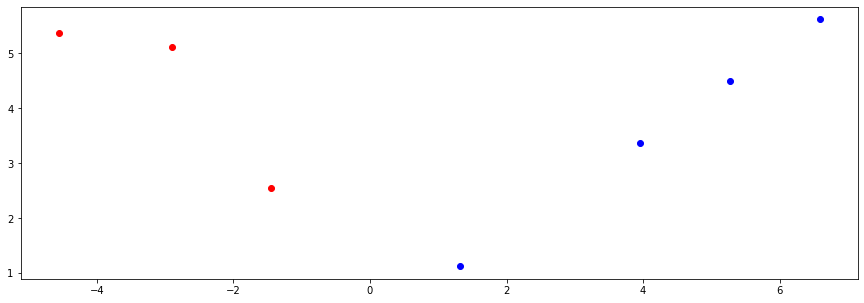

In [9]:
# 1. Set the fig size to (15,5)
# 2. Create propor title, axis and legend
# 3. Plot the data
fig = plt.figure(figsize=(15,5))
plt.scatter(compX[:,0][:4],compX[:,1][:4],c="b")
plt.scatter(compX[:,0][4:],compX[:,1][4:],c="r")
plt.show()


## Solution2: Directly computing  V and D 

Now we compute $V$ (aka as the eigenvectors), and the diagonal elements of $D$ (aka eigenvalues) from $A=X^TX=V D V^T$

The covariance matrix data matrix, $X$, can be computed as  $\frac{1}{N}X^TX$. <br>
If $X$ is our data matrix comprising of $d$ features. Then $X^TX$ is a $(d \times d)$ symmetrix matrix wherein each entry at location **ij** corresponds to the scalar projection of **feature i** with **feature j**.

In [10]:
# Alternative implementation：
# Directly computing V and D from X and X^T
# 1. Comput XTX using np.matmul() and store it.
XTX = np.matmul(New_centered.T,New_centered)
# 2. Apply np.linalg.eig() to clculate the eigen vectors and values
eigen_values,eigen_vectors = np.linalg.eig(XTX)

In [11]:
print("V (Eigen-vectors) = ")
print(np.around(eigen_vectors, decimals=3))
print()
print("diagonal elements of D (Eigen-values) = ")
print(np.around(eigen_values, decimals=3)) 
print()
print("sqrt(Eigen-values) = ")
print(np.around(np.sqrt(np.abs(eigen_values)), decimals=3))

V (Eigen-vectors) = 
[[-0.471 -0.356  0.389 -0.009  0.689]
 [-0.374 -0.412 -0.831 -0.     0.   ]
 [-0.471 -0.356  0.389  0.009 -0.689]
 [ 0.456 -0.537  0.061 -0.707 -0.16 ]
 [ 0.456 -0.537  0.061  0.707  0.16 ]]

diagonal elements of D (Eigen-values) = 
[110.093  16.726   1.753  -0.      0.   ]

sqrt(Eigen-values) = 
[10.492  4.09   1.324  0.     0.   ]


Notice the following:
1. That the **square-root of the eigen-values** of the covariance matrix $X^TX$ correspond exactly the the **singular values** of the data matrix $X$.
2. The **eigen-vectors** of $X^TX$ are exactly the same as the column vectors in the matrix $V$ when we performed SVD on $X$.

Therefore, the same Princpal components of our data matrix $X$, may be extracted via SVD or from $X$'s convariance matrix.


## Task 2: Human Faces 

Each image is a 62x47 pixel array. The images are read into a matrix called fea. Each row of the matrix fea represents one image (example). The features (columns) are the pixel values. Each example is represented by a vector of real numbers of length 2914, listing the pixels from left to right, row by row, from top to bottom.

In [12]:
# Import libs:
# 1. numpy
# 2. matplotlib and plt
# 3. pandas
# 4. fetch_lfw_people from sklearn.datasets
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_lfw_people

In [13]:
# Data set:
# 1. Load the dataset using fetch_lfw_people() with min_faces_per_person setted to be 70
#     detail of min_faces_per_person please refer to https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html
lfw=fetch_lfw_people(min_faces_per_person=70)
# 2. Store the number of images and its hight, width using lfw_people.images.shape
numberOFimages, h, w= lfw.images.shape
# 3. Calculate number of pixels
pixels=h*w
# 4. Store the pixel values using lfw_people.data
X = np.array(lfw.data)
y = lfw.target

In [14]:
def plt_face(x):
    global h,w
    plt.imshow(x.reshape((h, w)), cmap=plt.cm.gray)
    plt.xticks([])

Image Target:  5


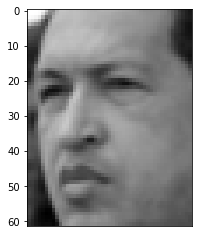

Image Target:  6


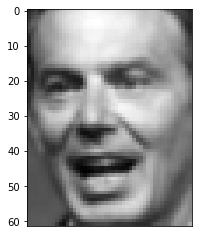

Image Target:  3


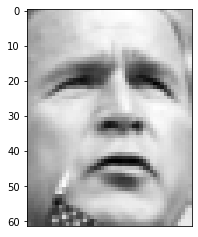

Image Target:  1


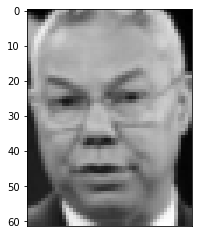

Image Target:  0


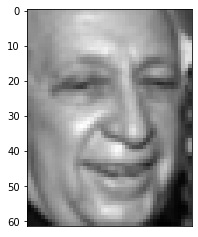

Image Target:  1


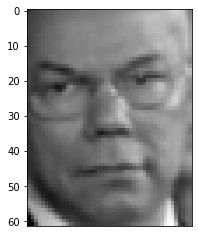

In [15]:

# Use the function we provided above, plot some faces:
# 1. Define the fig size to (10,20)
# 2. Use plt_face()
print("Image Target: ", y[0])
plt_face(X[0])
plt.show()
print("Image Target: ", y[1])
plt_face(X[1])
plt.show()
print("Image Target: ", y[2])
plt_face(X[2])
plt.show()
print("Image Target: ", y[3])
plt_face(X[3])
plt.show()
print("Image Target: ", y[4])
plt_face(X[4])
plt.show()
print("Image Target: ", y[5])
plt_face(X[5])
plt.show()



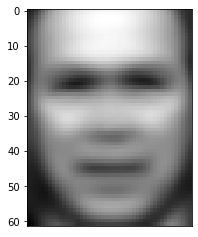

In [16]:
# Find the Mean picture:
# 1. Calculate the mean of the image data
# 2. Remove the mean from all the image
# 3. plot the face use plt_face()
Xmean = np.mean(X,axis = 0)
Xmean = Xmean[np.newaxis,:]
plt_face(Xmean)
Xcentered = X - Xmean

In [17]:
# Find eig vec and eig value:
# 1. Calculate the covariance metric of the zero_mean data
# 2. Use the np.linalg.eig() to compute eig value and eig vectors
u,s,vT = np.linalg.svd(Xcentered)
# 3. Find the top5 features
# 4. Calculate the new value based on the top5 feature.
# 5. Store the new value.
eigval = s*s
eigvec = vT
top5vector= eigvec[:5]
top5value= eigval[:5]

In [23]:
print("Top 5 Vector:")
print()
print(top5vector)
print()
print("Top 5 EigVal:")
print()
print(top5value)
print()
print("Associateed 5 attributes in fourth image")
print("Indexing by",top5vector)
print()
print(X[3],[top5vector])


Top 5 Vector:

[[ 0.00537343  0.00569514  0.00613803 ...  0.01043273  0.00883074
   0.00740469]
 [-0.01745991 -0.01647563 -0.01628433 ...  0.03319881  0.03265479
   0.03142723]
 [ 0.01783969  0.01602544  0.01488798 ...  0.03723508  0.03316043
   0.03093169]
 [ 0.03351924  0.03528838  0.03671131 ...  0.0384081   0.03525075
   0.02920213]
 [ 0.0131453   0.01357961  0.01403794 ... -0.09058423 -0.08371089
  -0.07456545]]

Top 5 EigVal:

[9.8932755e+08 7.9189370e+08 3.8294509e+08 3.1824365e+08 2.7124675e+08]

Associateed 5 attributes in fourth image
Indexing by [[ 0.00537343  0.00569514  0.00613803 ...  0.01043273  0.00883074
   0.00740469]
 [-0.01745991 -0.01647563 -0.01628433 ...  0.03319881  0.03265479
   0.03142723]
 [ 0.01783969  0.01602544  0.01488798 ...  0.03723508  0.03316043
   0.03093169]
 [ 0.03351924  0.03528838  0.03671131 ...  0.0384081   0.03525075
   0.02920213]
 [ 0.0131453   0.01357961  0.01403794 ... -0.09058423 -0.08371089
  -0.07456545]]

[13.333333   7.3333335  6.3333

In [19]:
# prjection of fourth face to first 5 principle components

The proejction of fourth image, d=5


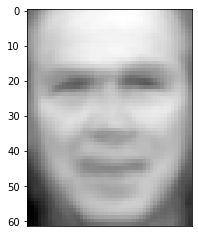

In [20]:
# project back to the image space where d=5
# X’= X_pca * VT  + X_mean 
print("The proejction of fourth image, d=5")
# compute the newfeature using top5 eig vec and eig val
p4 = np.matmul(X[3],top5vector.T)
p4 = p4[np.newaxis,:]
X4_D5 = np.dot(p4,top5vector)+ Xmean
# plot the feace
plt_face(X4_D5)

The projection of 4 image, d=50


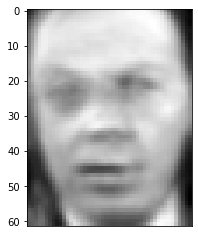

In [21]:
# project back to images where d=50
print("The projection of 4 image, d=50")
# 1. Find top 50 eig vec and eig val
# 2. Store the top 50 eig vec
# 3. Store the top 50 eig val
top50vector = eigvec[:50]
top50value= eigval[:50]
# 4. compute the newfeature using top50 eig vec and eig val
p50 = np.matmul(X[3],top50vector.T)
p50 = p50[np.newaxis,:]
X4_D50 = np.dot(p50,top50vector)+ Xmean
# 5. plot the feace
plt_face(X4_D50)